##Install The Dataset

In [2]:
pip install ucimlrepo

##Import the dataset

In [3]:
from ucimlrepo import fetch_ucirepo


#Import Iris dataset from the datasets

In [4]:
iris = fetch_ucirepo(id=53)

#3. Summarizing The dataset


##Dimention of the dataset

In [5]:
df = iris.data.original
print(df.shape)

(150, 5)


##Peek the data itself

In [6]:
print(df.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


##Statistical Summary of the attributes

In [7]:
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


##Breakdown the data by class veriables

In [8]:
print(df['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


##4.	Visualizing the dataset.

,0
sepal length,"Axes(0.125,0.11;0.168478x0.77)"
sepal width,"Axes(0.327174,0.11;0.168478x0.77)"
petal length,"Axes(0.529348,0.11;0.168478x0.77)"
petal width,"Axes(0.731522,0.11;0.168478x0.77)"


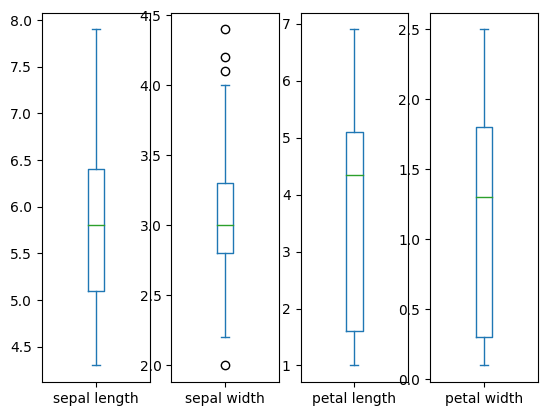

In [9]:
#Univariate plots
numeric_data = df.drop(columns=['class'])
#Box plot
numeric_data.plot(kind='box', subplots=True, sharex=False, sharey=False)

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

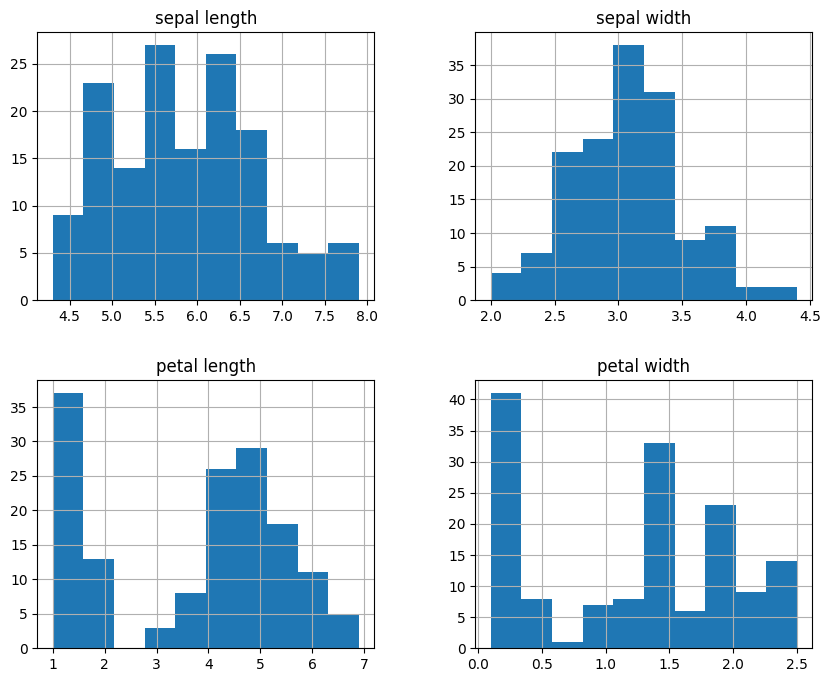

In [10]:
# Histogram
numeric_data.hist(figsize=(10, 8))

array([[<Axes: xlabel='sepal length', ylabel='sepal length'>,
        <Axes: xlabel='sepal width', ylabel='sepal length'>,
        <Axes: xlabel='petal length', ylabel='sepal length'>,
        <Axes: xlabel='petal width', ylabel='sepal length'>],
       [<Axes: xlabel='sepal length', ylabel='sepal width'>,
        <Axes: xlabel='sepal width', ylabel='sepal width'>,
        <Axes: xlabel='petal length', ylabel='sepal width'>,
        <Axes: xlabel='petal width', ylabel='sepal width'>],
       [<Axes: xlabel='sepal length', ylabel='petal length'>,
        <Axes: xlabel='sepal width', ylabel='petal length'>,
        <Axes: xlabel='petal length', ylabel='petal length'>,
        <Axes: xlabel='petal width', ylabel='petal length'>],
       [<Axes: xlabel='sepal length', ylabel='petal width'>,
        <Axes: xlabel='sepal width', ylabel='petal width'>,
        <Axes: xlabel='petal length', ylabel='petal width'>,
        <Axes: xlabel='petal width', ylabel='petal width'>]], dtype=object)

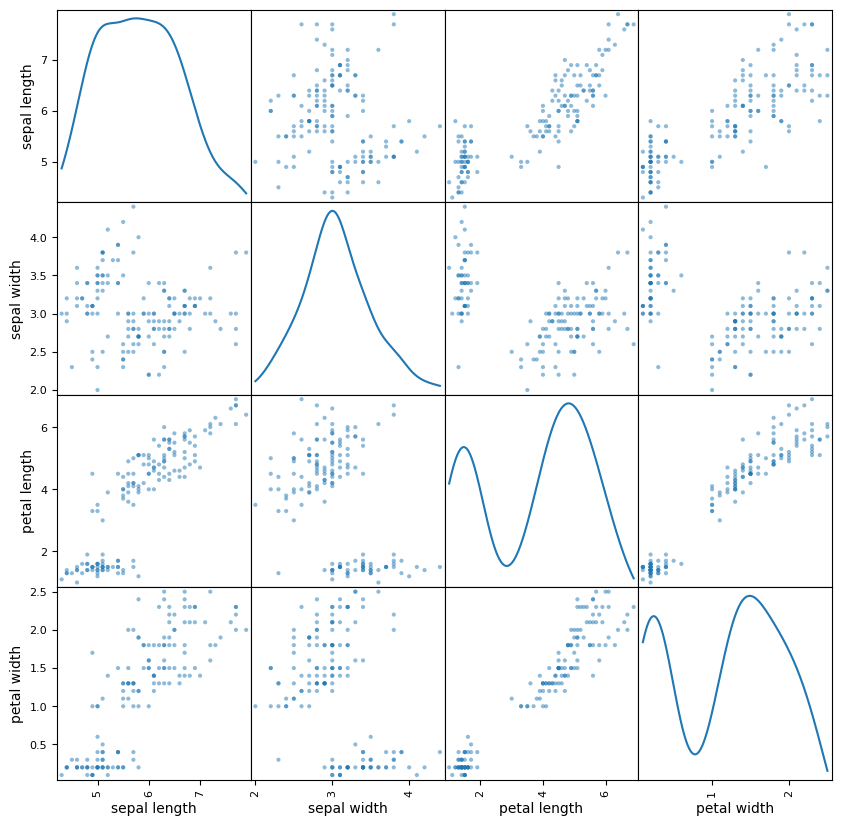

In [11]:
# Multivariate plots
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10), diagonal='kde')

##Prepare model

In [18]:
from sklearn.model_selection import train_test_split, KFold
x = df.iloc[:,:-1]
y = df['class']
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 1)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

##5. Evaluate Algorithms

In [17]:
models = []
from sklearn.linear_model import LogisticRegression
models.append(("Logistic Regression(LR)", LogisticRegression(max_iter=200)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
models.append(('Linear Discriminant Analysis(LDA)', LinearDiscriminantAnalysis()))

from sklearn.neighbors import KNeighborsClassifier
models.append(('K-Nearest Neighbors(KNN)', KNeighborsClassifier()))

from sklearn.tree import DecisionTreeClassifier
models.append(('Classification and Redression Trees (CART)', DecisionTreeClassifier()))

from sklearn.naive_bayes import GaussianNB
models.append(('Gaussian Naive Bayes(NB)', GaussianNB()))

from sklearn.svm import SVC
models.append(('Support Vector Machines(SVM)', SVC()))

from sklearn.model_selection import cross_val_score
for name, model in models:
  model_result = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
  print(f"{name} : {model_result.mean():.4f} ({model_result.std():.4f})")


Logistic Regression(LR) : 0.9667 (0.0408)
Linear Discriminant Analysis(LDA) : 0.9750 (0.0382)
K-Nearest Neighbors(KNN) : 0.9583 (0.0417)
Classification and Redression Trees (CART) : 0.9667 (0.0408)
Gaussian Naive Bayes(NB) : 0.9500 (0.0408)
Support Vector Machines(SVM) : 0.9667 (0.0408)


#6. Making some Predictions

In [20]:
#We choose the best model from the above tests
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
best_model = SVC()
best_model.fit(x_train, y_train)
predictions = best_model.predict(x_validation)
print(f"Accuracy: {accuracy_score(y_validation, predictions)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_validation, predictions)}")
print(f"Classification Report: \n{classification_report(y_validation, predictions)}")

Accuracy: 0.9666666666666667
Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

